# LPP Vetter Example

The LPP metric was developed for the Kepler Robovetter (Thompson et al. 2018, Thompson et al. 2015, apJ 812:46) to remove short period false positives that exhibit a quasi-sinusoidal phased light curve.  The LPP metric examines the shape of the folded light curve and compares it to the shape of known transits using dimensionality reduction algorithm called LPP (He and Niyogi 2004) and k-nearest neighbors.  The transit model used by the LPP metric (stored in `map_filename`) here was developed using the Kepler planet candidates.

This vetter requires `lpproj` by Jake Davenport to be installed.

In [1]:
from exovetter.tce import Tce
from exovetter import vetters as vet
from exovetter import const as exo_const
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

## Setup
Exovetter vetting alogrithms use TCE and lightkurve objects as input

In [2]:
# WASP-18 b TCE:
period = 0.94145223 * u.day
epoch = 1354.4579 * u.day
epoch_offset = exo_const.btjd
depth = 0.00931894 * exo_const.frac_amp
duration = 0.08932 * u.day

# create a TCE object using the exovetter.tce.Tce class
tce = Tce(period=period, epoch=epoch, epoch_offset=epoch_offset, 
          depth=depth, duration=duration, comment='example')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 1354.4579 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'comment': 'example'}

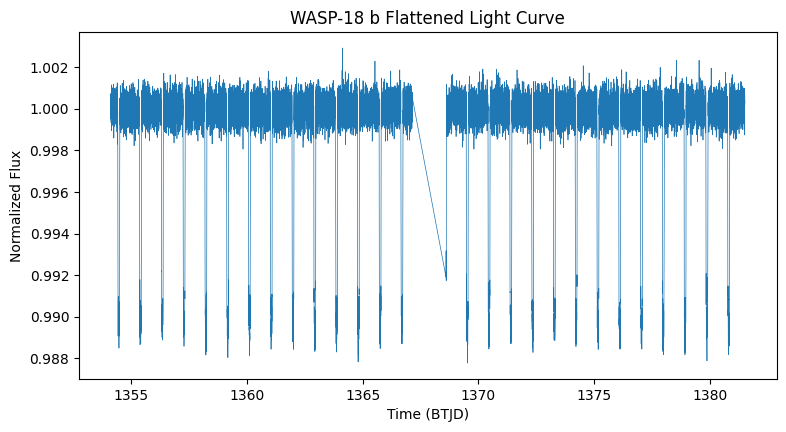

In [3]:
# Read in the flattened WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure(figsize=(9,4.5))
plt.plot(lc.time.value, lc.flux.value, lw=0.5) 
plt.title('WASP-18 b Flattened Light Curve')
plt.xlabel('Time (BTJD)')
plt.ylabel('Normalized Flux')
plt.show()

## Vetting
Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.LPP`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
lpp_instance = vet.Lpp()
lpp_results = lpp_instance.run(tce, lc)

lpp_results

/Users/mdallas/Desktop/exovetter_aas/exovetter/lpp.py:380: UserWarning: LPP requires a MES or SNR value stored as snr in the tce. Using a value of 10.0.
  warnings.warn('LPP requires a MES or SNR value stored as snr '


{'raw_lpp': 0.00010605318150829946,
 'norm_lpp': 0.123217106738894,
 'plot_data': {'bin_flux': array([ 0.00450182,  0.00551431,  0.00617499,  0.00791681,  0.00836298,
          0.00693292,  0.00667551,  0.00600625,  0.00634374,  0.00773376,
          0.00690432,  0.00744203,  0.00674988,  0.00697297,  0.00645242,
          0.00609777,  0.0062608 ,  0.0087348 ,  0.00841447,  0.0082543 ,
          0.00772232,  0.00617213,  0.00481072,  0.00449038,  0.0049337 ,
          0.00419293,  0.00423583,  0.0053713 ,  0.00521685,  0.00542278,
          0.00576028,  0.00521685,  0.005766  ,  0.00587468,  0.00658971,
          0.00521113,  0.00587468,  0.00517681,  0.00588612,  0.00666979,
          0.00910089,  0.00739054,  0.0019792 , -0.01981489, -0.07720601,
         -0.7610086 , -0.913041  , -0.9629558 , -0.99042434, -1.        ,
         -0.9904329 , -0.96631354, -0.91057557, -0.7508895 , -0.08221121,
         -0.02001796,  0.00146724,  0.00546854,  0.00503381,  0.00562299,
          0.0055743

In LPP, the results are as follows: 
* raw_lpp : Raw LPP value
* norm_lpp : LPP value normalized by period and SNR
* plot_data : The folded, binned transit prior to the LPP transformation

The following attributes are also available after running the vetter object:
* map_info : Map info from ``map_filename`` if supplied when initiating the LPP vetter object.
* lpp_data : `exovetter.lpp.Lppdata` (not much more description than that atm)
* metrics : lpp result dictionary.

`norm_lpp` is the prefered metric for vetting a TCE as it takes the signal to noise of the transit into account when comparing the shape to known transits.  The `raw_lpp` shows a slight trend with SNR. Typically a value of `norm_lpp` greater than ~3 are not transit-like.

## Plots
In order to generate diagnostic plots from vetters, we use the `plot` method with the vetter object after it has been run.

<Figure size 640x480 with 0 Axes>

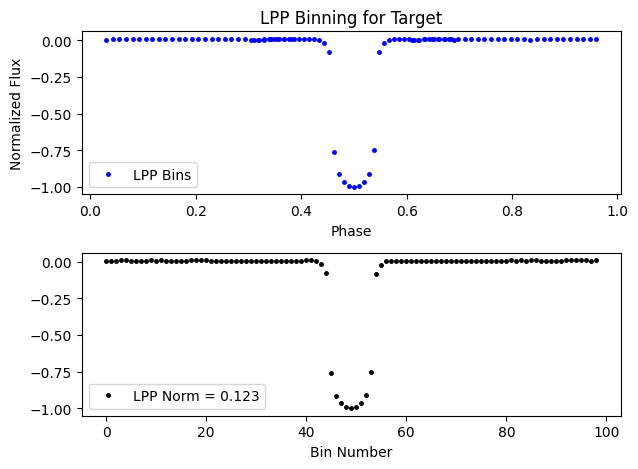

In [5]:
plt.figure()
lpp_instance.plot()
plt.show()

The same plots are made when using `plot=True` during the `run` method.

/Users/mdallas/Desktop/exovetter_aas/exovetter/lpp.py:380: UserWarning: LPP requires a MES or SNR value stored as snr in the tce. Using a value of 10.0.
  warnings.warn('LPP requires a MES or SNR value stored as snr '


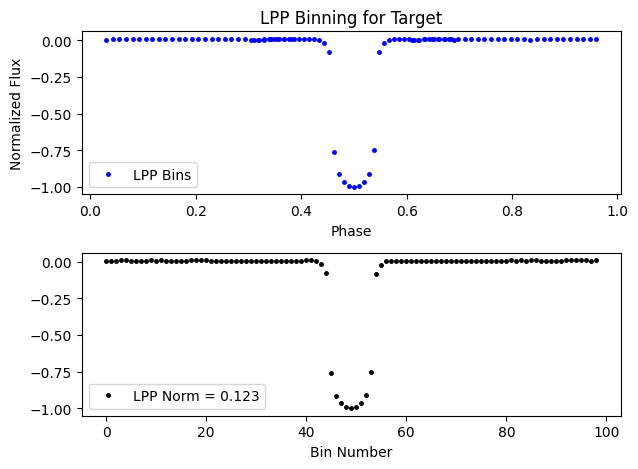

In [6]:
lpp_results = lpp_instance.run(tce, lc, plot=True)